In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#it is used because whatever plot we make using matplot that plot is made in jupyter notebook
import warnings
warnings.filterwarnings("ignore")
#hide all warnings

In [7]:
df=pd.read_csv("googleplaystore.csv")


In [9]:
df=pd.read_csv("googleplaystore.csv")
df_user=pd.read_csv("googleplaystore_user_reviews.csv")

In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [12]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [13]:
df.shape

(10841, 13)

In [14]:
print(f"The number of rows {df.shape[0]}, and columns are {df.shape[1]}.")

The number of rows 10841, and columns are 13.


In [15]:
print(f"The Name of columns:{df.columns}")

The Name of columns:Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [18]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

3 different types (varies with device,k,M)

In [19]:
df["Size"].isnull().sum()

0

In [23]:
df["Size"].loc[df["Size"].str.contains("k")].value_counts().sum()


316

In [21]:
df["Size"].loc[df["Size"].str.contains("M")].value_counts().sum()

8829

In [22]:
df["Size"].loc[df["Size"].str.contains("Varies with device")].value_counts().sum()

1695

In [24]:
df[df["Size"]=="1,000+"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [26]:
df.drop(df[df["Size"]=="1,000+"].index,inplace=True)
df.shape

(10840, 13)

In [27]:
#Convert the whoke Size column into Bytes.
#let's make  functions for conversion

def convert_size(size):
   if isinstance(size,str):
    if "k" in size:
      return float(size.replace("k",""))*1024
    elif "M" in size:
      return float(size.replace("M",""))*1024*1024
    elif "Varies with device" in size:
      return np.nan
   return size

In [28]:
df["Size"]=df["Size"].apply(convert_size)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
df.rename(columns={"Size":"Size(bytes)"},inplace=True)
df.head()

,App,Category,Rating,Reviews,Size(bytes),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [31]:
df["Reviews"].isnull().sum()

0

In [32]:
df["Reviews"]=df["Reviews"].astype(int)

In [33]:
df["Reviews"].dtype

dtype('int32')

In [34]:
#let convert Datatype of Install columns
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [35]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [36]:
df["Installs"].isnull().sum()
#No missing value present in Install column

0

remove+signs,remove columns,convert the column into int type

In [37]:
df["Installs"]=df["Installs"].apply(lambda x:x.replace("+","") if "+" in str(x) else x)
df["Installs"]=df["Installs"].apply(lambda x:x.replace(",","") if "," in str(x) else x)

In [38]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [40]:
df["Installs"]=df["Installs"].astype("int")


In [41]:
df["Installs"].dtype

dtype('int32')

In [42]:
df["Price"].isnull().sum()

0

In [43]:
df["Installs"].max()

1000000000

In [44]:
#making a new column where we will make install categorywise
bins=[-1,0,10,1000,10000,100000,1000000,10000000,1000000000]
labels=["no","Very low","Low","Moderate","More than moderate","High","Very high","Top Notch"]
df["Installs_Category"]=pd.cut(df["Installs"],bins=bins,labels=labels)

In [45]:
df["Installs_Category"].value_counts()

Installs_Category
Low                   2161
High                  2118
Very high             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

In [46]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [47]:
df["Price"].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

to make price column to int data type
remove rollar($)sign 
some columns doesnot have dollarsign

In [48]:
df["Price"].loc[df["Price"].str.contains("\$")].value_counts().sum()

800

In [49]:
df["Price"]=df["Price"].apply(lambda x:x.replace("$","") if "$" in str(x) else x)

In [50]:
df["Price"].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [51]:
df["Price"]=df["Price"].astype("float")

In [52]:
df["Price"].dtype

dtype('float64')

In [53]:
df.describe()

,Rating,Reviews,Size(bytes),Installs,Price
count,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,2.256133e+07,1.546434e+07,1.027368
std,0.515219,2.927761e+06,2.368637e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


Observations: -We have only 5 numeric columns

-We can observe descriptive statistics of each columns and make tons of observation as per our hypothesis

-we can see rating column has Rating and Size column has some missing values

-Rating column has 1 minimum rating and 5 maximum rating

-minimum Price of a app is 0 and maximum is 400

-similarly we can observe for all the columns.

Dealing of Missing Values

There are different ways by which we can handle missing values

1.Missing value can be directly drop using df.dropna() (less than 45% missing value than we can drop)

2.Use imputation technique-mean, median, mode (if missing value % is grater than 45)

3.But if the columns null value we want to drop is having higher correlation to other columns than we use different method.

In [54]:
df.isnull().sum().sort_values(ascending=False)

Size(bytes)          1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Installs_Category       0
dtype: int64

In [55]:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size(bytes)          15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Type                  0.01
App                   0.00
Category              0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Content Rating        0.00
Genres                0.00
Last Updated          0.00
Installs_Category     0.00
dtype: float64

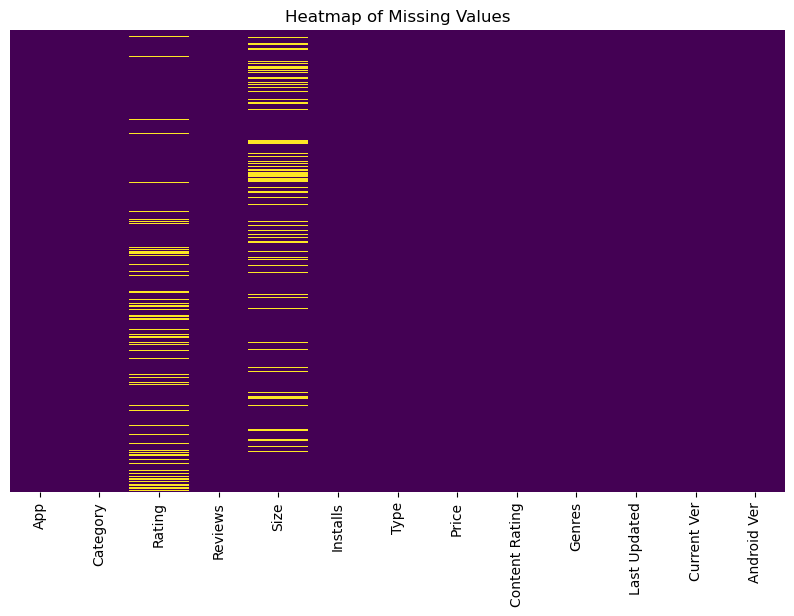

In [64]:

# Plot the missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()


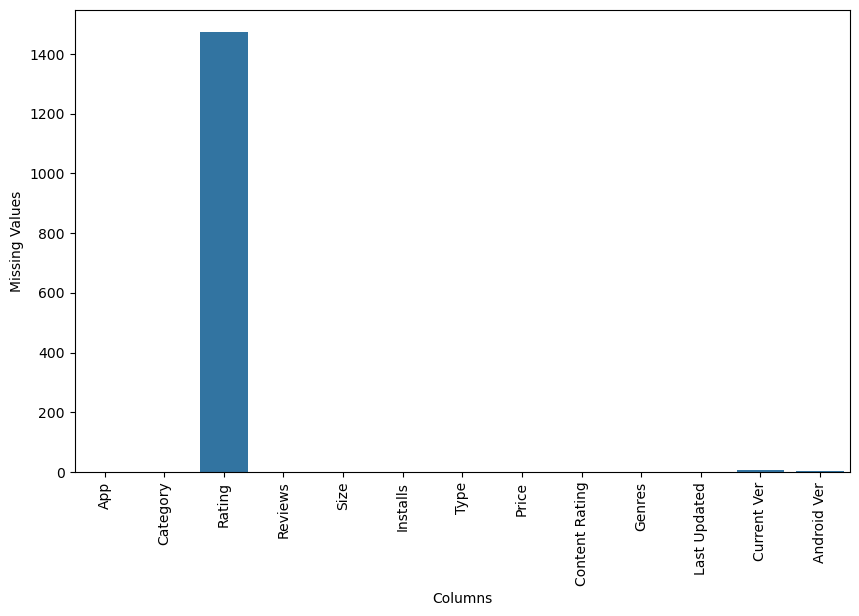

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.isnull().sum().index,y=df.isnull().sum().values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()

Observation:

1.We have 1695 missing value in Size(bytes) column. (15.64% missing value of the total values in column)

2.We have 1474 missing value in Rating column.(13.60% missing value of the total values in column)

3.We have 8 missing value in Current Ver column.(0.07% missing value of the total values in column)

4.We have 2 missing value in Android Ver column.(0.02% missing value of the total values in column)

5.We have 1 missing value in Type Vercolumn.(0.01% missing value of the total values in column)

--So lets drop Current Ver, Android Ver and types columns as they are very less in number and it will not affect our data


In [59]:
df.dropna(subset=["Current Ver","Android Ver","Category", "Type"], inplace=True)

In [60]:
df.shape 

(10829, 13)

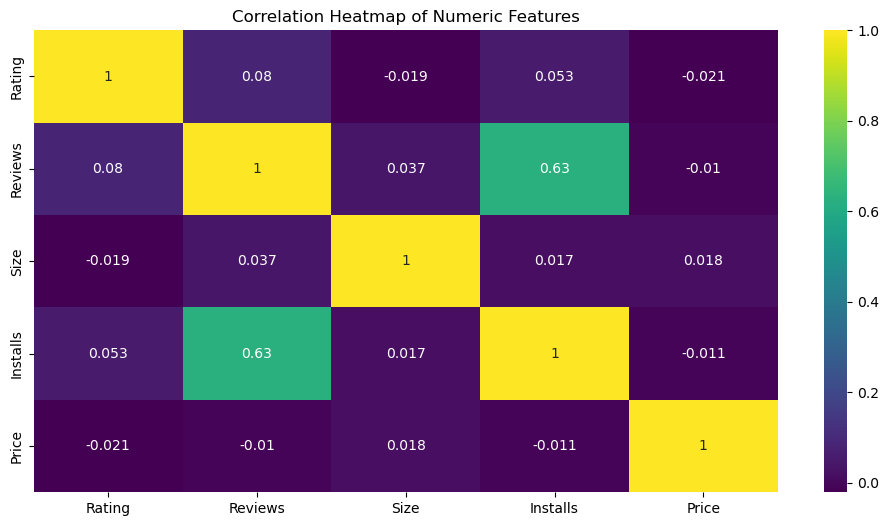

In [63]:


plt.figure(figsize=(12,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [65]:
df[numeric_cols].corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,-0.018843,0.051355,-0.021903
Reviews,0.068141,1.000000,0.032105,0.643122,-0.009667
Size,-0.018843,0.032105,1.000000,0.014753,0.014495
Installs,0.051355,0.643122,0.014753,1.000000,-0.011689
Price,-0.021903,-0.009667,0.014495,-0.011689,1.000000


In [66]:
#missing values in Dataset coumnwise
df.isnull().sum().sort_values(ascending=False)

Size              1696
Rating            1474
Current Ver          8
Android Ver          3
Reviews              1
Installs             1
Type                 1
Price                1
Content Rating       1
App                  0
Category             0
Genres               0
Last Updated         0
dtype: int64

In [78]:
df.groupby("Installs_Category")["Rating"].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_Category,,,,,,,,
0-1K,1360.0,4.198897,0.833518,1.0,3.9,4.4,4.8,5.0
1K-10K,1442.0,4.035160,0.604533,1.4,3.8,4.2,4.5,5.0
10K-100K,1617.0,4.093197,0.505468,1.6,3.9,4.2,4.5,4.9
100K-1M,2115.0,4.207470,0.376423,1.8,4.0,4.3,4.5,4.9
1M-10M,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
10M-100M,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
100M+,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7


In [77]:
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
0-1K        1336
1K-10K        89
10K-100K      31
100K-1M        3
1M-10M         0
10M-100M       0
100M+          0
Name: count, dtype: int64

In [79]:
print(df.columns.tolist())


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Installs_Category']


In [80]:
df.groupby("Installs_Category")["Rating"].describe()


,count,mean,std,min,25%,50%,75%,max
Installs_Category,,,,,,,,
0-1K,1360.0,4.198897,0.833518,1.0,3.9,4.4,4.8,5.0
1K-10K,1442.0,4.035160,0.604533,1.4,3.8,4.2,4.5,5.0
10K-100K,1617.0,4.093197,0.505468,1.6,3.9,4.2,4.5,4.9
100K-1M,2115.0,4.207470,0.376423,1.8,4.0,4.3,4.5,4.9
1M-10M,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
10M-100M,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
100M+,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7


In [82]:
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
0-1K        1336
1K-10K        89
10K-100K      31
100K-1M        3
1M-10M         0
10M-100M       0
100M+          0
Name: count, dtype: int64

In [83]:
def fill_missing_ratings(df, category, fill_value):
  # Filter the DataFrame for rows where the category matches and rating is missing
  filtered_df = df[(df['Installs_Category'] == category) & df['Rating'].isnull()]
  # Fill the missing values with the specified value
  df.loc[filtered_df.index, 'Rating'] = fill_value
  return df

In [84]:
df = fill_missing_ratings(df, 'Low', 4.170970)
df = fill_missing_ratings(df, 'Very low', 4.637037)
df = fill_missing_ratings(df, 'Moderate', 4.035417)
df = fill_missing_ratings(df, 'More than moderate', 4.093255)
df = fill_missing_ratings(df, 'High', 4.207525)
df = fill_missing_ratings(df, 'Very high',4.287076 )
df = fill_missing_ratings(df, 'no', 0)

In [85]:
df['Installs_Category'].loc[df['Rating'].isnull()].value_counts()

Installs_Category
0-1K        1336
1K-10K        89
10K-100K      31
100K-1M        3
1M-10M         0
10M-100M       0
100M+          0
Name: count, dtype: int64

In [86]:
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


In [87]:
df.drop_duplicates(inplace=True)

In [88]:
df.duplicated().sum()

0

In [97]:
print(df.columns.tolist())


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Log_Reviews']


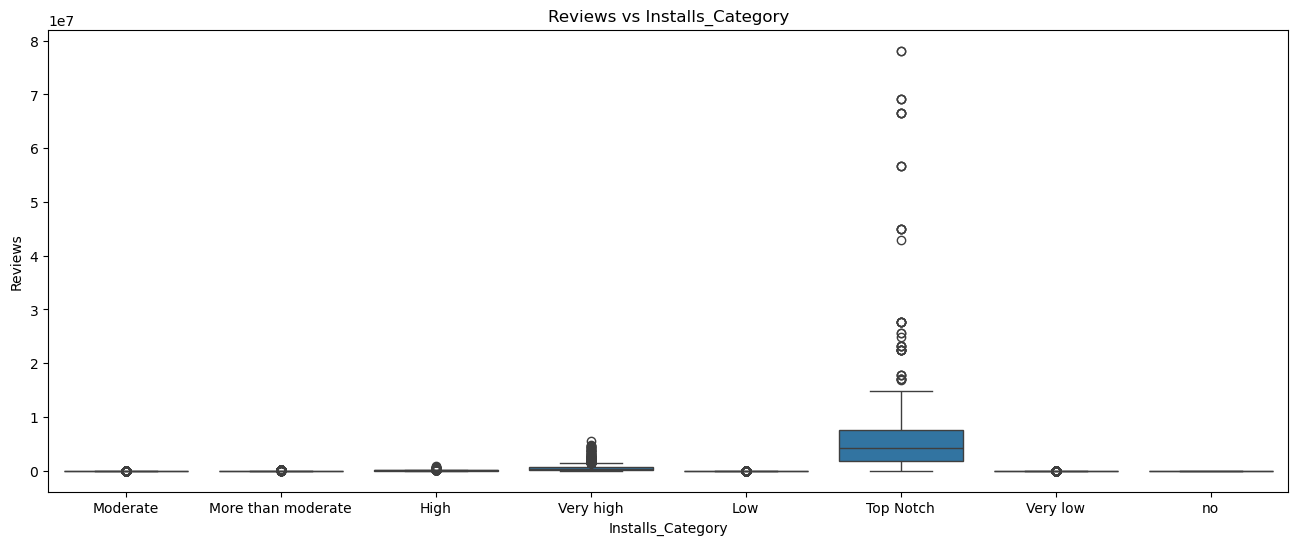

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean 'Installs' column
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Step 2: Create 'Installs_Category'
def map_installs(n):
    if pd.isna(n) or n == 0:
        return "no"
    elif n < 1_000:
        return "Very low"
    elif n < 10_000:
        return "Low"
    elif n < 100_000:
        return "Moderate"
    elif n < 1_000_000:
        return "More than moderate"
    elif n < 10_000_000:
        return "High"
    elif n < 100_000_000:
        return "Very high"
    else:
        return "Top Notch"

df['Installs_Category'] = df['Installs'].apply(map_installs)

# Step 3: Create log-transformed reviews column
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Log_Reviews'] = np.log1p(df['Reviews'])

# Step 4: Plot boxplot
plot_df = df[['Installs_Category', 'Log_Reviews']].dropna()


plt.figure(figsize=(16, 6))
sns.boxplot(x='Installs_Category', y= 'Reviews', data=df)
plt.title("Reviews vs Installs_Category")
plt.xlabel('Installs_Category')
plt.ylabel('Reviews')
plt.show()
plt.show()


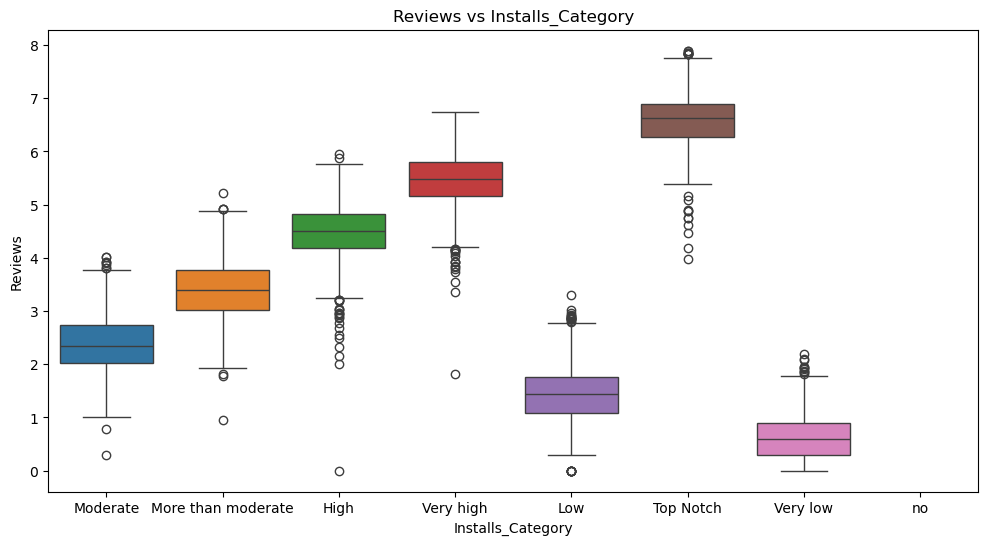

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Installs_Category', y= np.log10(df['Reviews']),hue="Installs_Category" ,data=df)
plt.title("Reviews vs Installs_Category")
plt.xlabel('Installs_Category')
plt.ylabel('Reviews')
plt.show()

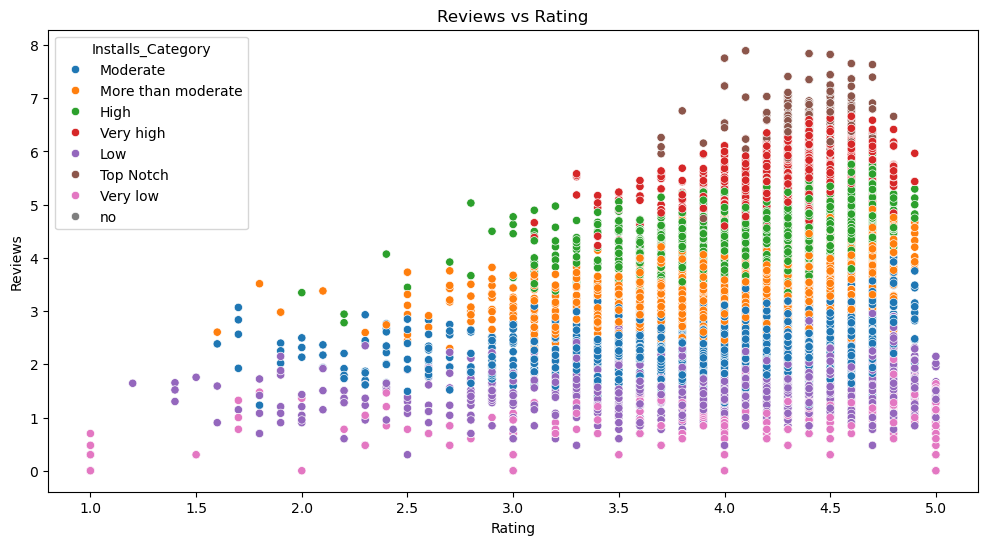

In [101]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y=np.log10(df['Reviews']), hue='Installs_Category', data=df)
plt.title("Reviews vs Rating")
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

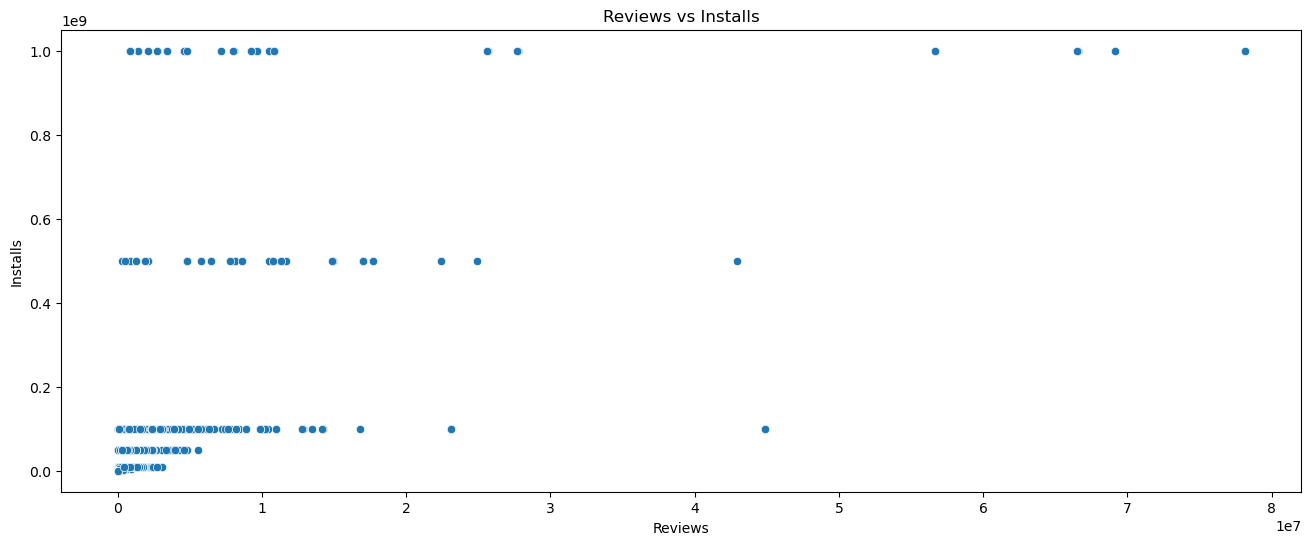

In [102]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df)
plt.title("Reviews vs Installs")
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

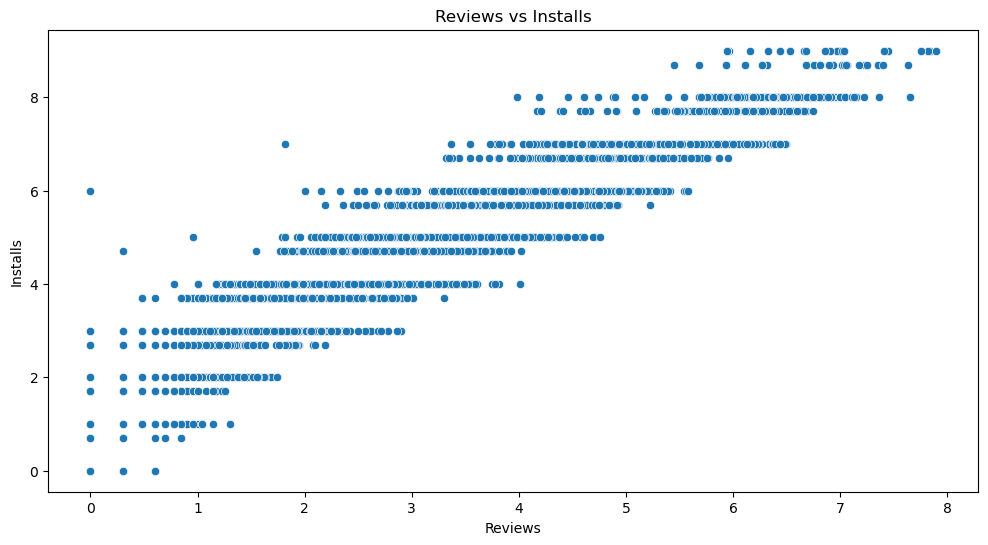

In [103]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(12, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df)
plt.title("Reviews vs Installs")
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

observation 1.As number of install Increases, Reviews also incrases. Which is true in real world scenerio. As number of user incraeses, reviews also increases. We can see above plot they have direct relationship with each other.Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+,
1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight
trends here. Let's plot a line plot to see the trend.

<Figure size 1200x600 with 0 Axes>

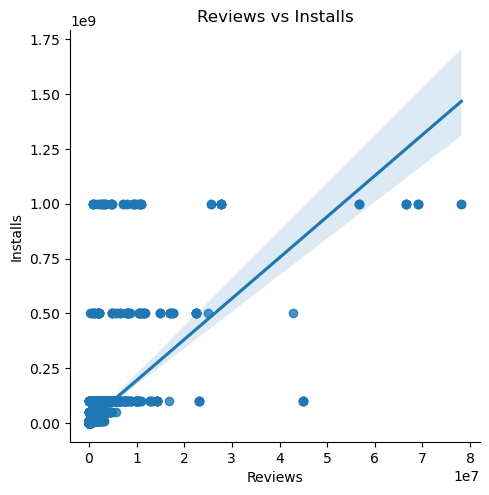

In [104]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(12, 6))
sns.lmplot(x='Reviews', y='Installs', data=df)
plt.title("Reviews vs Installs")
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

In [105]:
df["Category"].unique().shape

(34,)

In [106]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index() #(Highest Rating-we are taking mean)

,Category,Rating
0,1.9,19.000000
1,EVENTS,4.435556
2,EDUCATION,4.389032
3,ART_AND_DESIGN,4.358065
4,BOOKS_AND_REFERENCE,4.346067
5,PERSONALIZATION,4.335987
6,PARENTING,4.300000
7,GAME,4.286326
8,BEAUTY,4.278571
9,HEALTH_AND_FITNESS,4.277104


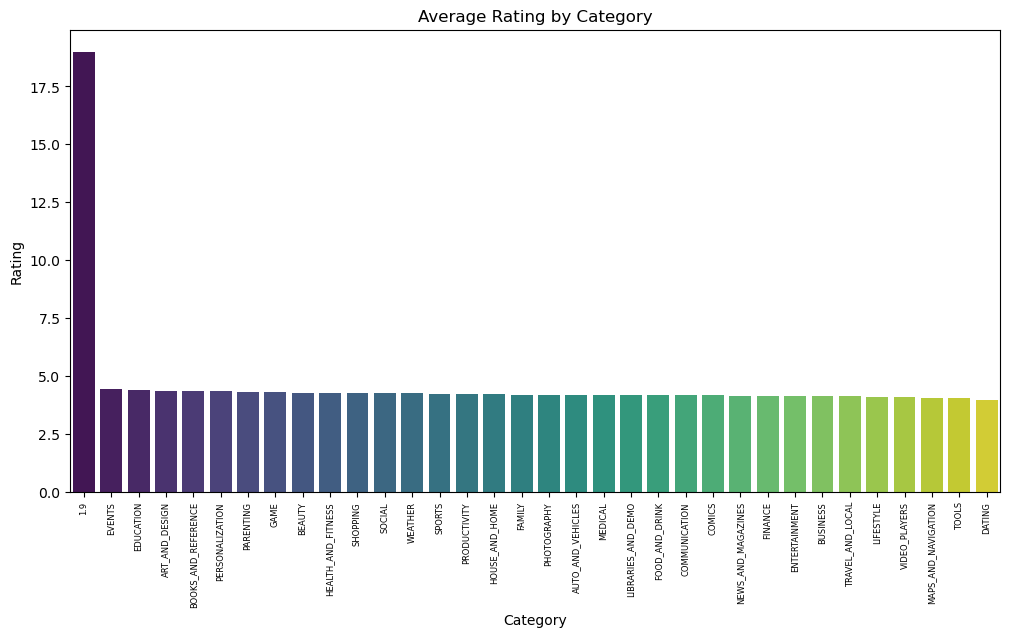

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Rating', data=df.groupby('Category')['Rating'].mean().sort_values(ascending=False).reset_index(), palette="viridis")
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=90,fontsize=6)
plt.show()

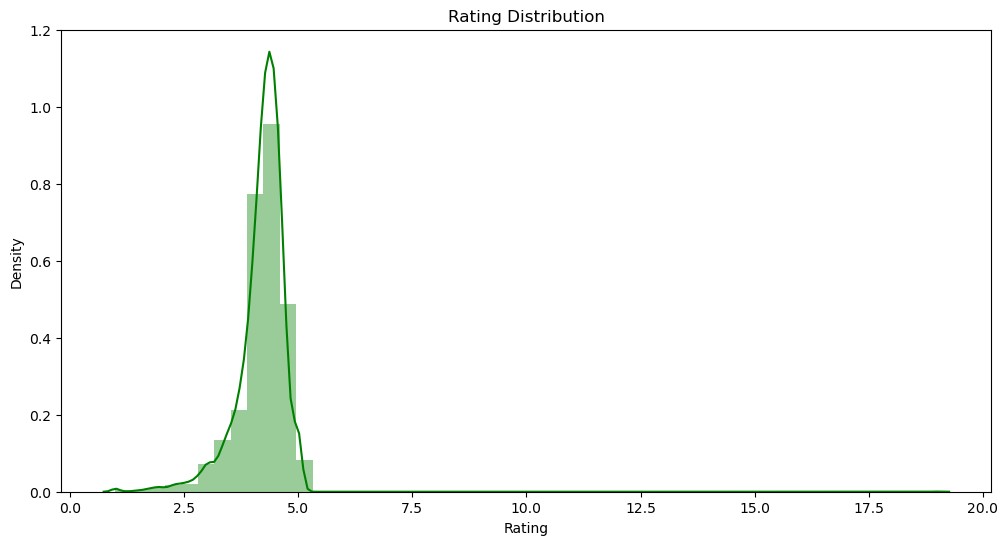

In [108]:
# plot the rating distribution
plt.figure(figsize=(12, 6))
sns.distplot(df['Rating'], color="green",kde=True)
plt.title("Rating Distribution")
plt.show()

**Observation:**

1. Top 5 Category according to Rating are:
-	EVENTS-4.394346

- EDUCATION-4.373794

- BOOKS_AND_REFERENCE-4.358435

- PERSONALIZATION-4.322099

- ART_AND_DESIGN-4.298885

2. Almost 33 unique Category of Playstore have average rating 4+.

In [109]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).reset_index()

,Category,Reviews
0,GAME,1.585422e+09
1,COMMUNICATION,8.154623e+08
2,SOCIAL,6.212414e+08
3,FAMILY,4.102263e+08
4,TOOLS,2.731850e+08
5,PHOTOGRAPHY,2.135166e+08
6,SHOPPING,1.150412e+08
7,PRODUCTIVITY,1.141170e+08
8,VIDEO_PLAYERS,1.103802e+08
9,PERSONALIZATION,8.934614e+07


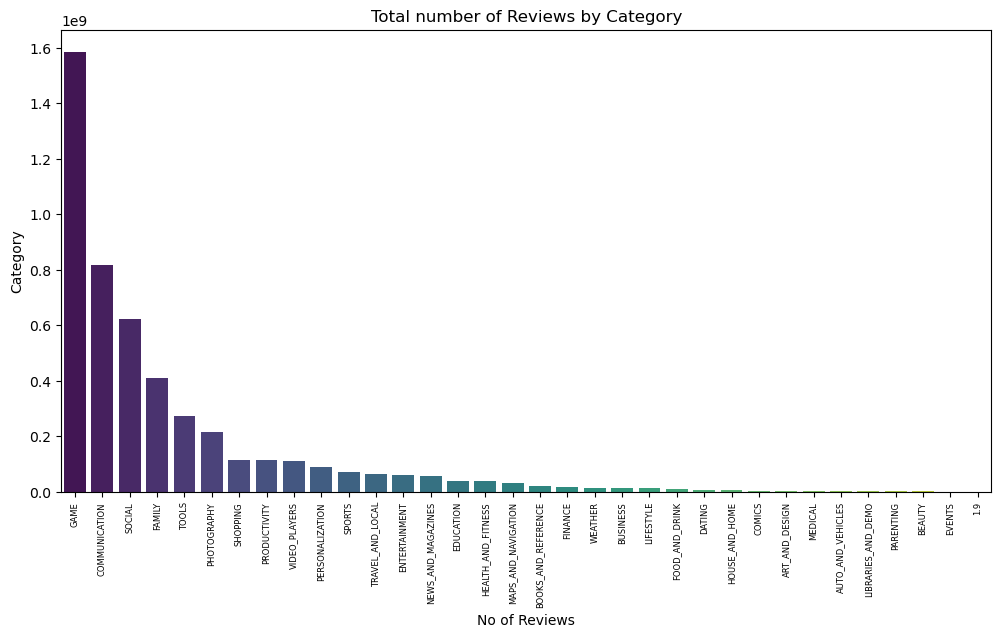

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category',y="Reviews",data=df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).reset_index(), palette="viridis")
plt.xlabel('No of Reviews')
plt.ylabel('Category')
plt.title('Total number of Reviews by Category')
plt.xticks(rotation=90,fontsize=6)
plt.show()

1.Top 5 Category which has highest Reviews are:
- GAME - 1415536650 Reviews
-	COMMUNICATION	- 601273552 Reviews
-	SOCIAL - 533576829 Reviews
-	FAMILY - 396771746 Reviews
-	TOOLS	- 273181033 Reviews

In [111]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index().head(5)

,Category,Installs
0,GAME,3.508602e+10
1,COMMUNICATION,3.264728e+10
2,PRODUCTIVITY,1.417609e+10
3,SOCIAL,1.406987e+10
4,TOOLS,1.145277e+10


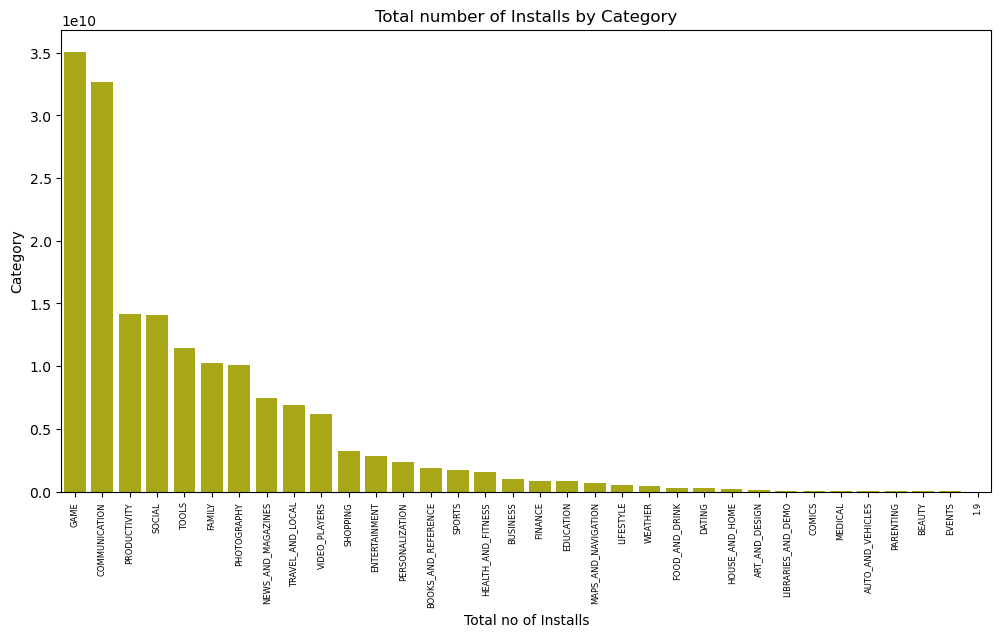

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category',y="Installs",data=df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index(), color="y")
plt.xlabel('Total no of Installs')
plt.ylabel('Category')
plt.title('Total number of Installs by Category')
plt.xticks(rotation=90,fontsize=6)
plt.show()


1.Top 5 Category which is highest Installed  are:
- GAME - 31544024415 Installs
-	COMMUNICATION	- 24152276251 Installs
- SOCIAL - 12513867902 Installs
- PRODUCTIVITY- 12463091369 Installs
- TOOLS - 11452271905 Installs
2.Games lead by far with 31.5B installs, showing huge global interest in mobile gaming.

3.Communication apps (24.2B installs) highlight mobile’s role in staying connected.

4.Social and productivity apps are nearly tied (~12.5B installs), reflecting balanced use for fun and work.

5.Tools category (11.4B installs) shows strong demand for device-enhancing utilities.

In [113]:
df['Category'].value_counts().sort_values(ascending=False).reset_index().head(5)

,Category,count
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460


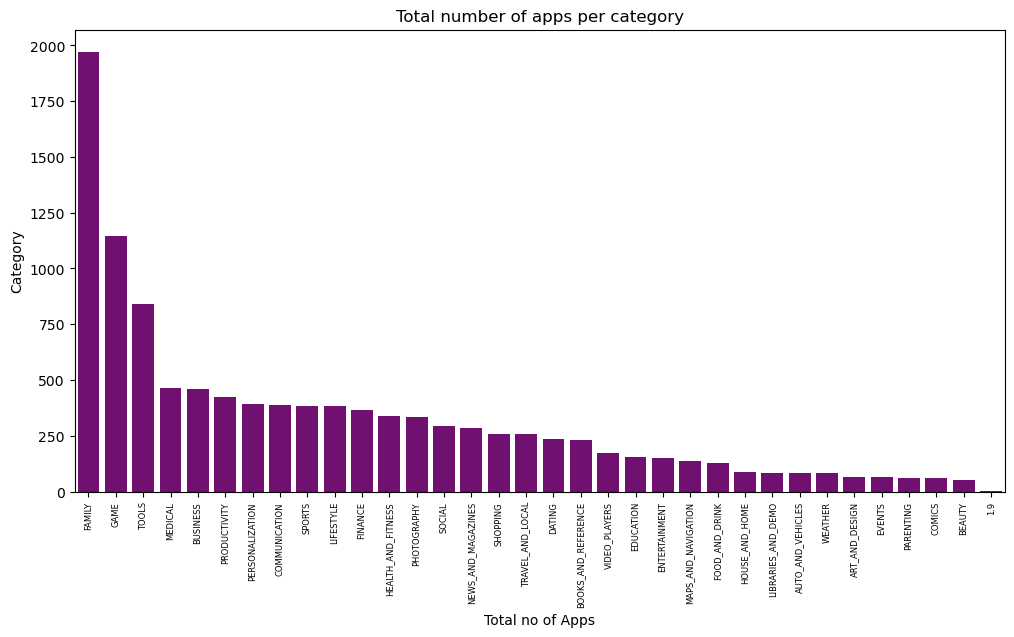

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category',y="count",data=df['Category'].value_counts().sort_values(ascending=False).reset_index(), color="purple")
plt.xlabel('Total no of Apps')
plt.ylabel('Category')
plt.xticks(rotation=90,fontsize=6)
plt.title("Total number of apps per category")
plt.show()


1. The **Family** category has the most apps (1,939), showing how much focus there is on apps for kids and household use.  
2. **Games** come next with 1,121 apps—no surprise, since it's such a popular space for both users and developers.  
3. There are **841 Tools apps**, which makes sense since people often look for ways to boost their phone’s performance or features.  
4. **Business and Medical** categories also have a solid presence, with 427 and 408 apps, showing growing interest in work and health-related solutions.

In [115]:
df['Genres'].value_counts().head(5)

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64

In [116]:
top_5genres=df['Genres'].value_counts().head(5)

In [117]:
top_5genres

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64

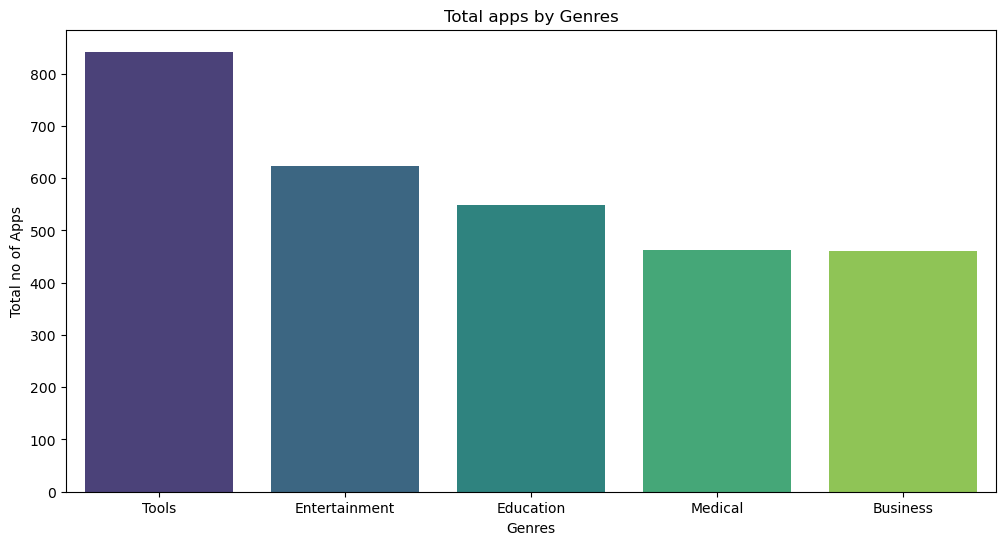

In [118]:
#plot top 5 generes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5genres.index,y=top_5genres.values, palette="viridis")
plt.title("Total apps by Genres")
plt.xlabel('Genres')
plt.ylabel('Total no of Apps')
plt.show()



1. **Tools** has the most apps (840), which makes sense since people often look for ways to improve their phone's performance.  
2. **Entertainment** is next with 587 apps—lots of options for movies, music, and fun.  
3. **Education** has 526 apps, showing that learning through mobile apps is pretty popular now.  
4. **Business** comes in with 427 apps, helping people stay productive and organized.  
5. **Medical** has 408 apps, reflecting a growing interest in health and wellness through technology.

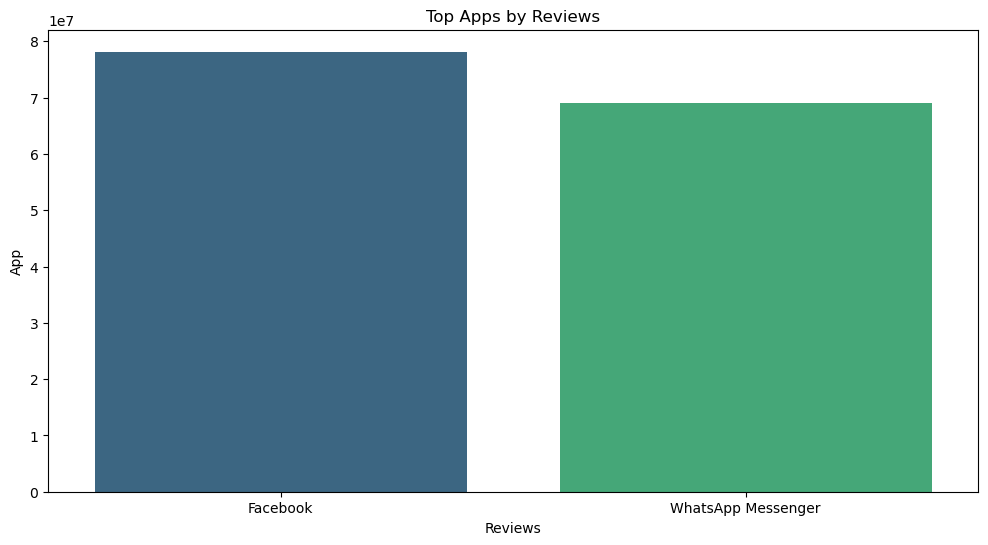

In [123]:
plt.figure(figsize=(12,6))
sns.barplot(y='Reviews',x="App",data=df.sort_values("Reviews",ascending=False).head(5), palette="viridis")
plt.xlabel('Reviews')
plt.ylabel('App')
plt.title("Top Apps by Reviews")
plt.show()

1. **Facebook**, **WhatsApp Messenger** have the highest number of reviews, showing just how widely used and engaged users are with these social media and communication apps.

In [124]:
df.groupby("Type")["Installs"].mean().sort_values(ascending=False).reset_index()

,Type,Installs
0,Free,1.669095e+07
1,Paid,9.119510e+04
2,0,NaN


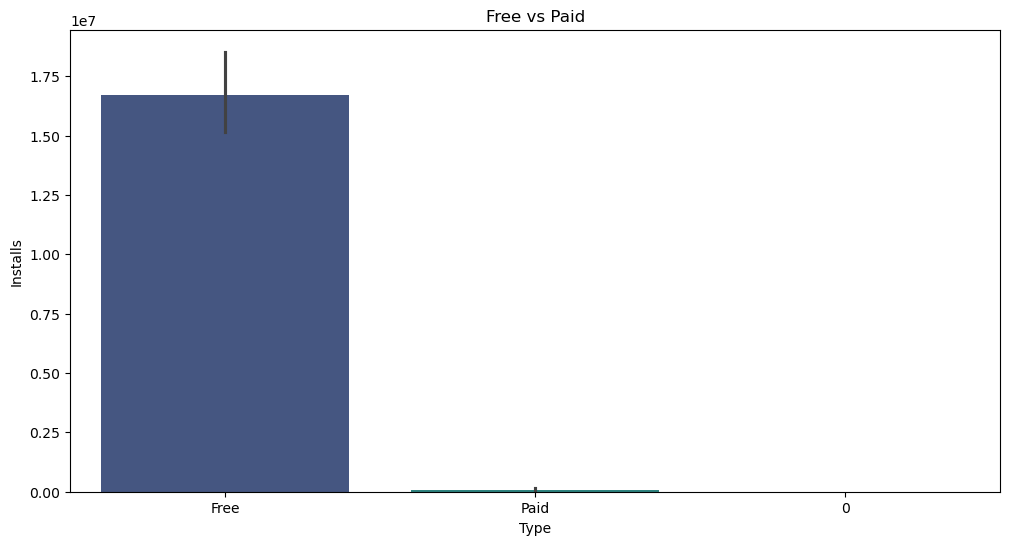

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Type',y="Installs",data=df, palette="viridis")
plt.title("Free vs Paid")
plt.xlabel('Type')
plt.show()

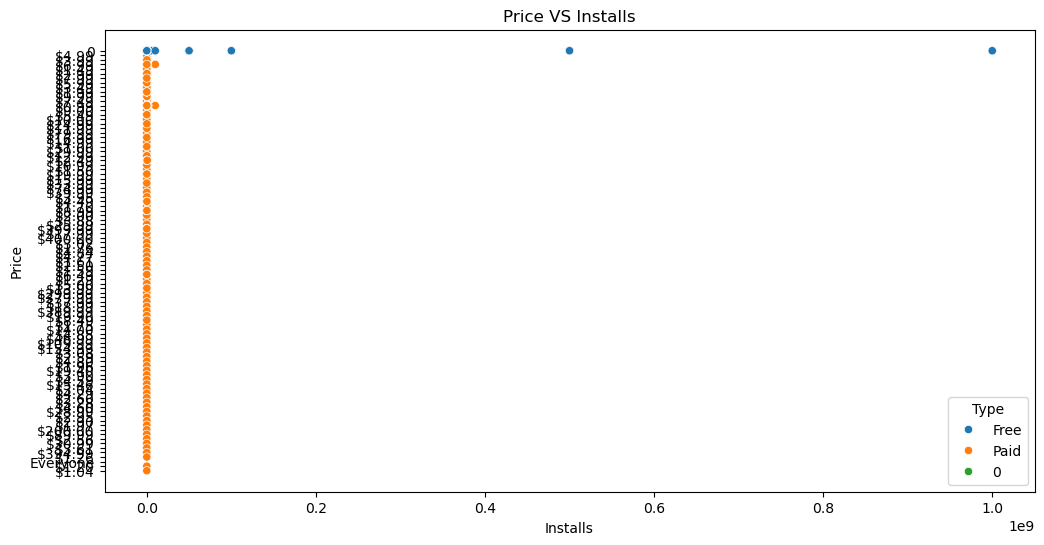

In [126]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Installs",y="Price",hue="Type",data=df)
plt.title("Price VS Installs")
plt.show()

<Figure size 1200x600 with 0 Axes>

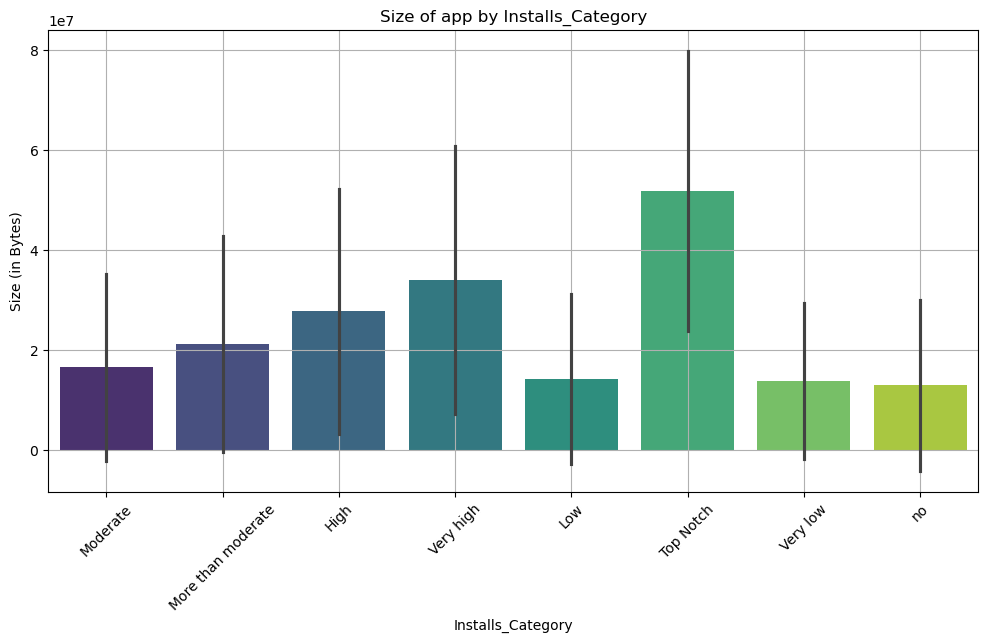

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Clean and convert the 'Size' column to BYTES
def convert_size_to_bytes(size_str):
    if 'M' in size_str:
        return float(size_str.replace('M', '')) * 1_000_000  # MB to Bytes
    elif 'k' in size_str:
        return float(size_str.replace('k', '')) * 1_000       # KB to Bytes
    else:
        return np.nan

# Clean the 'Size' column
df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size_bytes'] = df['Size'].apply(lambda x: convert_size_to_bytes(x) if isinstance(x, str) else x)

# Step 2: Drop rows with NaNs in relevant columns
plot_df = df[['Installs_Category', 'Size_bytes']].dropna()

# Step 3: Plot average size in bytes by installs category
plt.figure(figsize=(12,6))
sns.barplot(x="Installs_Category", y="Size_bytes", data=plot_df, palette="viridis", errorbar="sd")
plt.title("Size of app by Installs_Category")
plt.xlabel('Installs_Category')
plt.ylabel("Size (in Bytes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Observation:**  
As the **app size increases**, the **number of installs also tends to increase**.

It implies that **larger apps**—which often have more features, better graphics, or higher quality—are more likely to attract users. People may associate **bigger apps with better performance or richer experiences**, especially in categories like games or entertainment.

In [134]:
df["Content Rating"].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

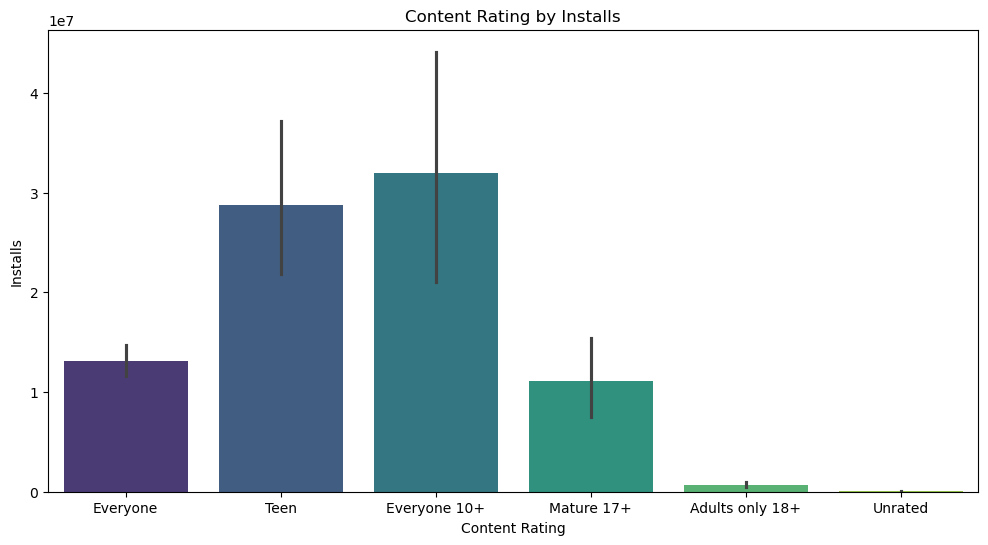

In [135]:
plt.figure(figsize=(12,6))
sns.barplot(x="Content Rating",y="Installs",data=df, palette="viridis")
plt.title("Content Rating by Installs")
plt.xlabel('Content Rating')
plt.ylabel('Installs')
plt.show()

Apps rated **"Everyone 10+"** have the highest number (8,372), followed by **"Teen"** and **"Everyone"**.
This shows that **family-friendly apps** are the most popular, as they appeal to a wider audience. Developers may prefer targeting "Everyone" ratings to reach more users and get higher installs.Ultimately Which will increase their revenue.

In [136]:
df[df["Type"]=="Free"].sort_values("Rating",ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Reviews,Installs_Category,Size_KB,Size_bytes
5268,AJ Rafael Music Lessons,FAMILY,5.0,1.0,8.2M,10.0,Free,0,Everyone,Entertainment,"November 29, 2017",1.2.1,4.1 and up,0.693147,Very low,8200.0,8200000.0
640,Online Girls Chat Group,DATING,5.0,5.0,5.0M,100.0,Free,0,Mature 17+,Dating,"August 2, 2018",8.2,4.0.3 and up,1.791759,Very low,5000.0,5000000.0
8102,Cy-Fair VFD EMS Protocols,MEDICAL,5.0,2.0,20M,100.0,Free,0,Everyone 10+,Medical,"September 21, 2017",1.8.3,4.1 and up,1.098612,Very low,20000.0,20000000.0
8104,Cy-Fair Christian Church,LIFESTYLE,5.0,2.0,9.3M,100.0,Free,0,Everyone,Lifestyle,"August 3, 2017",24.8.1,4.1 and up,1.098612,Very low,9300.0,9300000.0
8146,CZ-Help,BOOKS_AND_REFERENCE,5.0,2.0,1.4M,5.0,Free,0,Everyone,Books & Reference,"July 13, 2018",0.1,4.4 and up,1.098612,Very low,1400.0,1400000.0


In [137]:
df[(df["Type"]=="Free") & (df["Rating"]==5)].shape

(246, 17)

In [138]:
df[df["Type"]=="Paid"].sort_values("Rating",ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Reviews,Installs_Category,Size_KB,Size_bytes
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2.0,35M,10.0,Paid,$0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up,1.098612,Very low,35000.0,35000000.0
8287,AC DC Power Monitor,LIFESTYLE,5.0,1.0,1.2M,10.0,Paid,$3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,0.693147,Very low,1200.0,1200000.0
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13.0,500k,100.0,Paid,$1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,2.639057,Very low,500.0,500000.0
5917,Ra Ga Ba,GAME,5.0,2.0,20M,1.0,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,1.098612,Very low,20000.0,20000000.0
5966,BC MVA Fines,BOOKS_AND_REFERENCE,5.0,5.0,7.2M,50.0,Paid,$1.75,Everyone,Books & Reference,"October 8, 2015",1,4.1 and up,1.791759,Very low,7200.0,7200000.0


In [139]:
df[(df["Type"]=="Paid") & (df['Rating']==5)].shape

(28, 17)

In [140]:
df[df["Type"]=="Paid"].sort_values("Reviews",ascending=False)["App"].head(5)

2241                        Minecraft
4347                        Minecraft
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
8860                      Bloons TD 5
Name: App, dtype: object

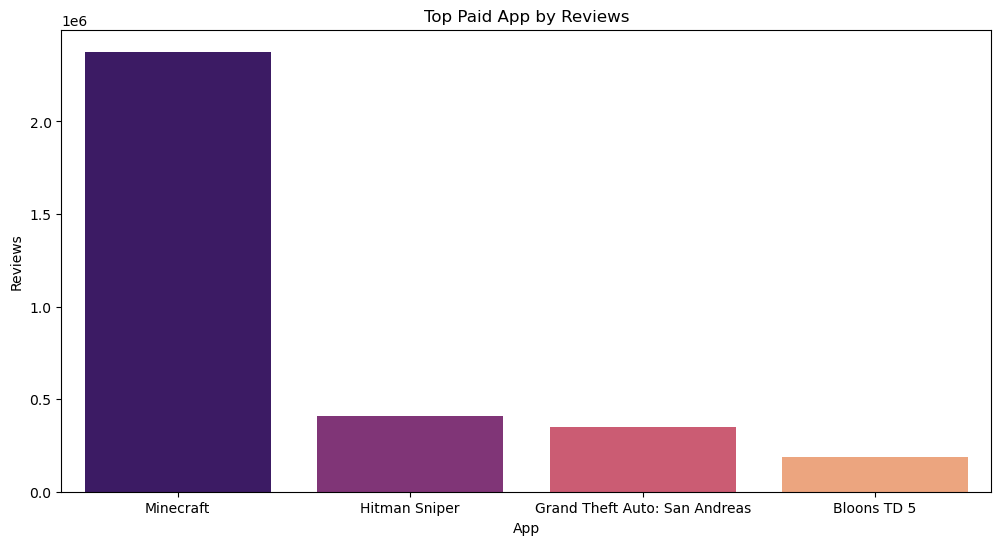

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(y='Reviews',x="App",data=df[df["Type"]=="Paid"].sort_values("Reviews",ascending=False).head(5), palette="magma")
plt.title("Top Paid App by Reviews")
plt.xlabel('App')
plt.ylabel('Reviews')
plt.show()

In [144]:
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [146]:
# Clean and convert 'Installs'
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean and convert 'Price'
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate Revenue
df['Revenue'] = df['Installs'] * df['Price']

# Filter and show top 11 paid apps by revenue
top_paid_apps = df[(df["Type"] == "Paid") & (df["Revenue"] > 0)] \
                   .drop_duplicates(subset=["App"]) \
                   .sort_values("Revenue", ascending=False) \
                   .head(11)

top_paid_apps


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Reviews,Installs_Category,Size_KB,Size_bytes,Revenue
2241,Minecraft,FAMILY,4.5,2376564.0,nan,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,14.681167,Very high,NaN,NaN,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up,8.174139,More than moderate,1800.0,1800000.0,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,7.532624,Moderate,4700.0,4700000.0,19999500.0
4034,Hitman Sniper,GAME,4.6,408292.0,29M,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,12.919740,Very high,29000.0,29000000.0,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,26M,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,12.762721,High,26000.0,26000000.0,6990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,872k,1000000.0,Paid,5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up,10.084433,High,872.0,872000.0,5990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,48M,1000000.0,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up,10.810818,High,48000.0,48000000.0,5990000.0
8804,DraStic DS Emulator,GAME,4.6,87766.0,12M,1000000.0,Paid,4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,11.382441,High,12000.0,12000000.0,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,5.620401,Moderate,7300.0,7300000.0,4000000.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,6.577861,Moderate,26000.0,26000000.0,3999900.0


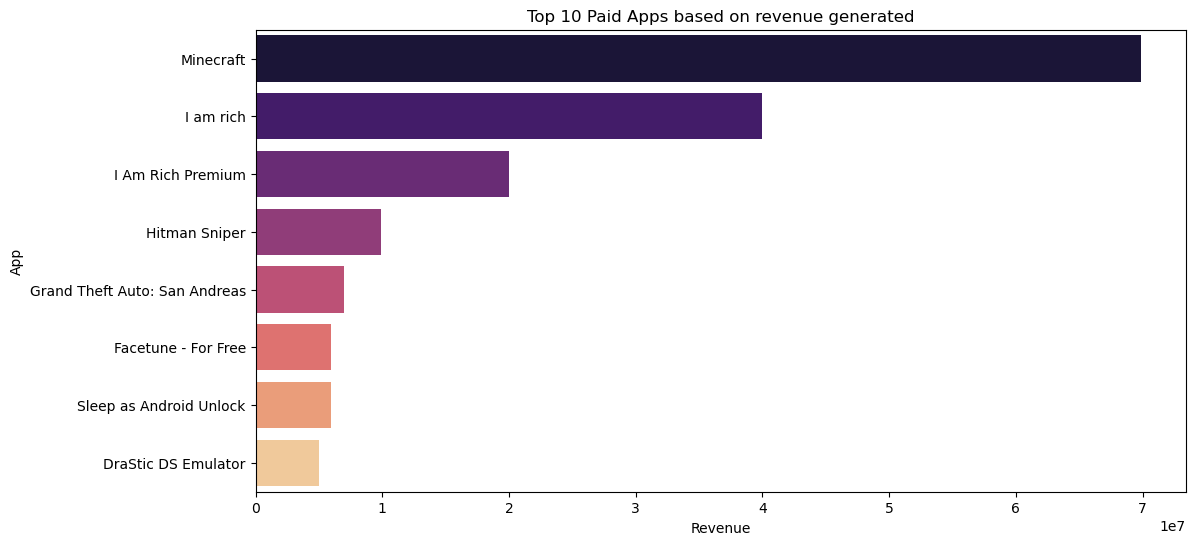

In [147]:
#plot top 10 paid apps based on revenue generated
plt.figure(figsize=(12,6))
sns.barplot(x='Revenue',y="App",data=df[(df["Type"]=="Paid") & (df["Revenue"]>0)].sort_values("Revenue",ascending=False).head(11).drop_duplicates(subset=["App"]), palette="magma")
plt.title("Top 10 Paid Apps based on revenue generated")
plt.show()



-Revenue generated  formula: **Revenue=Installs*Price**

-here revenue refers to the money earned only from paid app installs.

-The top Categories in which these apps falls are **lifestyle, family, Game**

-**Minecraft, I am rich and I Am Rich Premium** are the top paid apps based on revenue generated

In [148]:
df_user.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [149]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [150]:
df_user.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [152]:
nan_rows.shape

(26868, 5)

In [153]:
df_user.dropna(inplace=True)

In [154]:
df_user.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [155]:
df_user.duplicated().sum()

7735

In [156]:
df_user.drop_duplicates(inplace=True)

In [157]:
df_user.duplicated().sum()

0

In [158]:
merge_data = pd.merge(df, df_user,how="left", on = "App")

In [159]:
merge_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Reviews,Installs_Category,Size_KB,Size_bytes,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,5.075174,Moderate,19000.0,19000000.0,0.0,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,I hate,Negative,-0.800,0.900000
6,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,omgggggg,Neutral,0.000,0.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,It cute.,Positive,0.500,1.000000
8,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,I love,Positive,0.500,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,More than moderate,14000.0,14000000.0,0.0,Love,Positive,0.500,0.600000


In [160]:
merge_data.shape

(56341, 22)

In [161]:
merge_data.duplicated().sum()

6648

In [162]:
merge_data.isnull().sum()

App                           0
Category                      0
Rating                     1511
Reviews                       1
Size                          0
Installs                      1
Type                          1
Price                         1
Content Rating                1
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   3
Log_Reviews                   1
Installs_Category             0
Size_KB                   17877
Size_bytes                17877
Revenue                       1
Translated_Review          9612
Sentiment                  9612
Sentiment_Polarity         9612
Sentiment_Subjectivity     9612
dtype: int64

In [163]:
merge_new=merge_data.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"])

In [164]:
merge_new.shape

(46729, 22)

In [165]:
49681-9267

40414

In [166]:
merge_new.isnull().sum()

App                           0
Category                      0
Rating                       38
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Log_Reviews                   0
Installs_Category             0
Size_KB                   16596
Size_bytes                16596
Revenue                       0
Translated_Review             0
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

In [167]:
merge_new.to_csv("Merge2DF.csv")

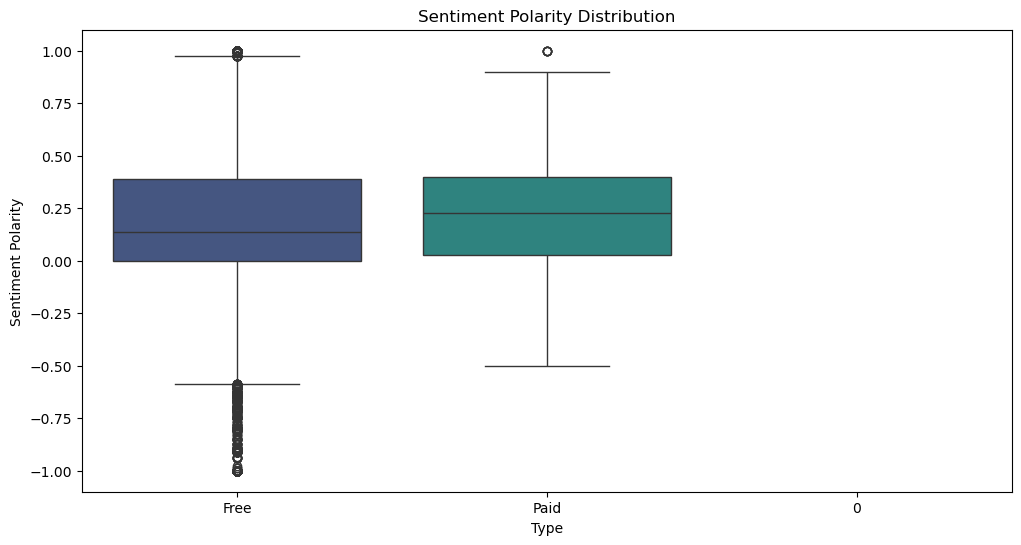

In [168]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merge_data, palette="viridis")
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Type')
plt.ylabel('Sentiment Polarity')
plt.show()

In [169]:
merge_data.groupby(["Type","Sentiment"])["Sentiment"].count()

Type  Sentiment
Free  Negative     10901
      Neutral       5883
      Positive     29425
Paid  Negative        82
      Neutral         32
      Positive       406
Name: Sentiment, dtype: int64

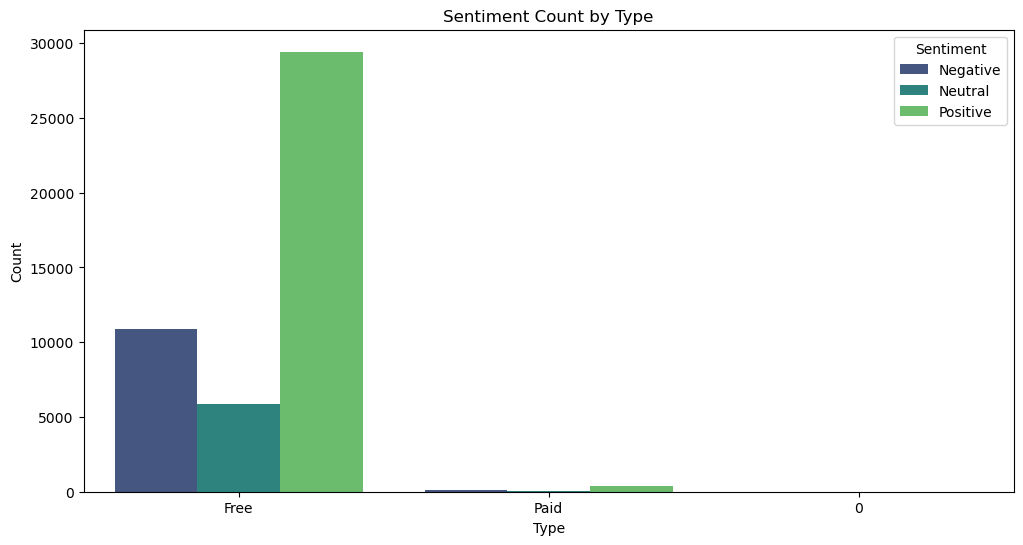

In [170]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', hue='Sentiment', data=merge_data, palette="viridis")
plt.title('Sentiment Count by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Free apps** get way more feedback overall—both good and bad—since more people use them. But even with some **negative reviews**, most feedback is **positive**.  
**Paid apps** have fewer reviews, but most of them are also **positive**, which shows that people are generally happy when they pay for something they find valuable.

In [171]:
merge_data["Sentiment"].value_counts()

Sentiment
Positive    29831
Negative    10983
Neutral      5915
Name: count, dtype: int64

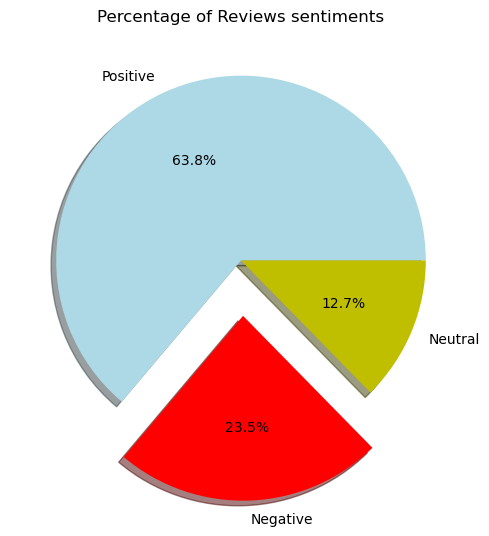

In [172]:
plt.figure(figsize=(12, 6))
plt.pie(merge_data["Sentiment"].value_counts(), labels=["Positive","Negative","Neutral"], shadow=True,autopct='%1.1f%%', colors=['lightblue', 'red', 'y'],explode=(0,0.3,0))
plt.title('Percentage of Reviews sentiments')
plt.show()

In [173]:
merge_data[merge_data["Sentiment"]=="Positive"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Reviews,Installs_Category,Size_KB,Size_bytes,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,,,,,,,,,,,,,,,,,
Helix Jump,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378,378
8 Ball Pool,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336,336
"CBS Sports App - Scores, News, Stats & Watch Live",336,336,336,336,336,336,336,336,336,336,336,336,336,336,0,0,336,336,336,336,336
Calorie Counter - MyFitnessPal,330,330,330,330,330,330,330,330,330,330,330,330,330,330,0,0,330,330,330,330,330
Bowmasters,318,318,318,318,318,318,318,318,318,318,318,318,318,318,0,0,318,318,318,318,318
Duolingo: Learn Languages Free,315,315,315,315,315,315,315,315,315,315,315,315,315,315,0,0,315,315,315,315,315
Google Photos,304,304,304,304,304,304,304,304,304,304,304,304,304,304,0,0,304,304,304,304,304
Bubble Shooter,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294
DRAGON BALL LEGENDS,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280,280


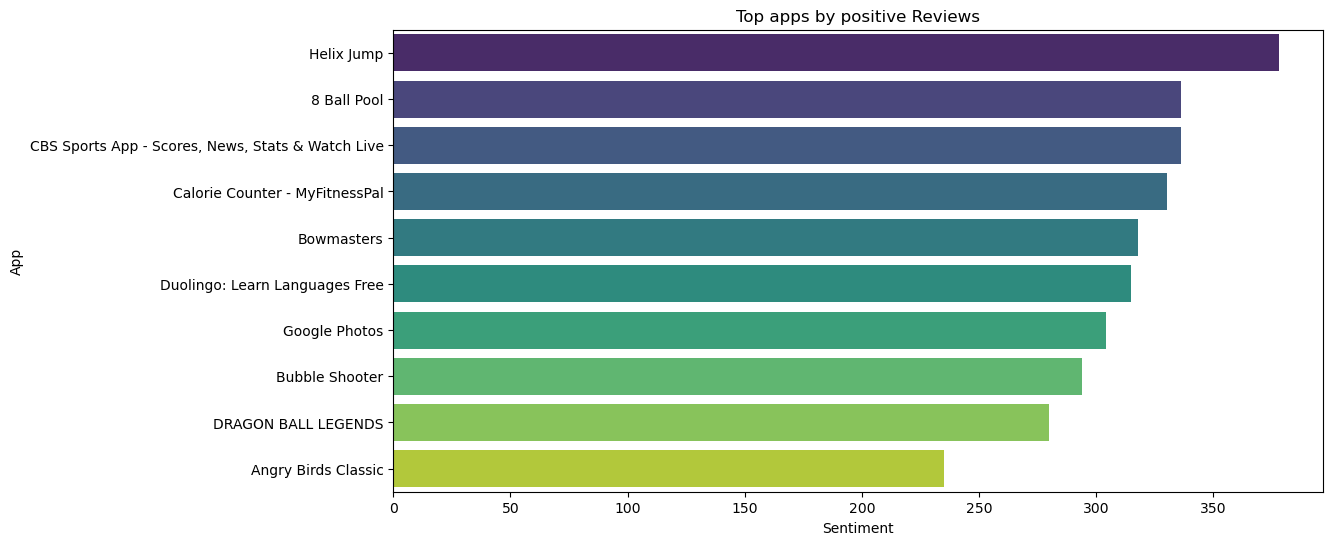

In [174]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment',y="App",data=merge_data[merge_data["Sentiment"]=="Positive"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10), palette="viridis")
plt.title('Top apps by positive Reviews')
plt.show()

Helix Jump app has highest 378 positive Sentiment count.

In [175]:
merge_data[(merge_data["App"]=="Helix Jump") & (merge_data["Sentiment"]=="Positive")].shape

(378, 22)

In [176]:
merge_data[merge_data["Sentiment"]=="Negative"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Reviews,Installs_Category,Size_KB,Size_bytes,Revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,,,,,,,,,,,,,,,,,
8 Ball Pool,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322
Angry Birds Classic,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
Bowmasters,216,216,216,216,216,216,216,216,216,216,216,216,216,216,0,0,216,216,216,216,216
Helix Jump,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
Block Puzzle,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160
Clash Royale,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152
Candy Crush Soda Saga,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
Candy Crush Saga,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
Bubble Shooter,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144


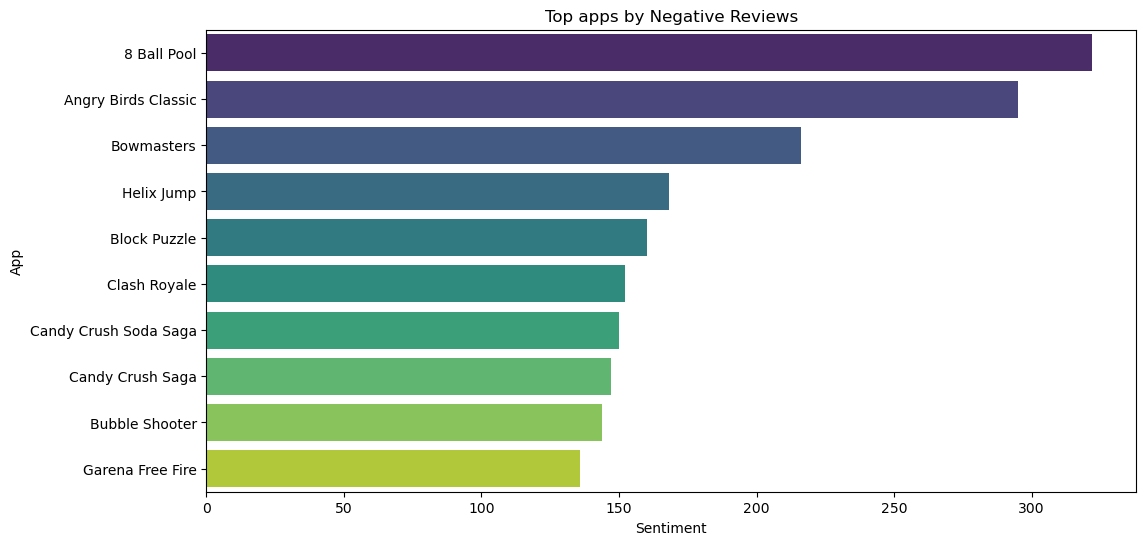

In [177]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment',y="App",data=merge_data[merge_data["Sentiment"]=="Negative"].groupby(["App"]).count().sort_values("Sentiment",ascending=False).head(10), palette="viridis")
plt.title('Top apps by Negative Reviews')
plt.show()

In [ ]:
8 Ball Pool app has highest 322 positive Sentiment count.